# Real Estate house price prediction

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    int64  
 4   NOX         506 non-null    float64
 5   RM          501 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    int64  
 9   TAX         506 non-null    int64  
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
 housing.columns = housing.columns.str.strip()

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282693,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704402,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

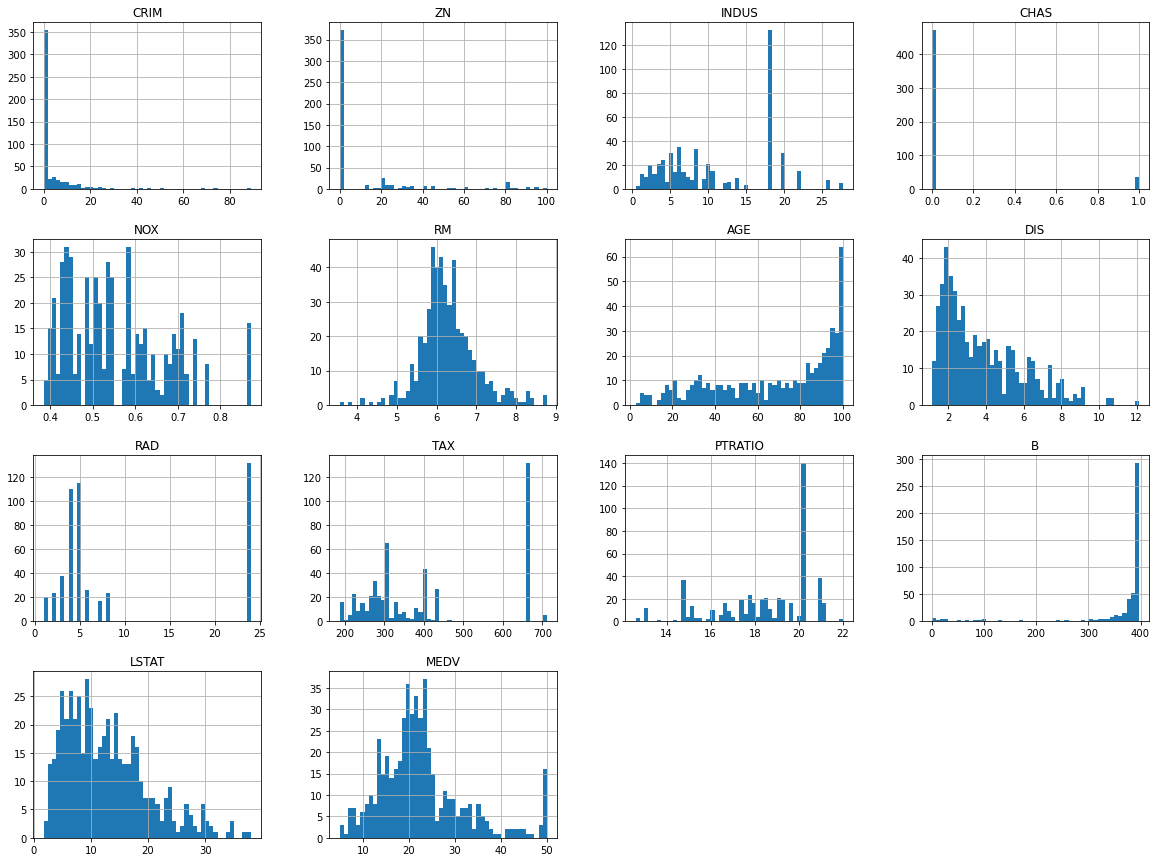

In [10]:
housing.hist(bins=50, figsize=(20,15))

## Train-Test splitting for testing our model we use test data

In [11]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled =np.random.permutation(len(data))
    print(shuffled)
    test_set_size =int(len(data)*test_ratio)
    test_indices =shuffled[:test_set_size]
    train_indices =shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]


In [12]:
#train_set , test_set = split_train_test(housing, 0.2)

In [13]:
#print(f"rows in train set:{len(train_set)}\nrows in test set:{len(test_set)}\n")

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size =0.2, random_state=42)
print(f"rows in train set:{len(train_set)}\nrows in test set:{len(test_set)}\n")

rows in train set:404
rows in test set:102



# stratifiedshuffledsplit (so data gone homogenous in train set and test set)

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set =housing.loc[train_index]
    strat_test_set =housing.loc[test_index]

In [16]:
 strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
 strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [18]:
housing = strat_train_set.copy()

# looking for correlations in data( so we can able to remove outlayer data)

In [19]:
corr_matrix =housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678761
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [20]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

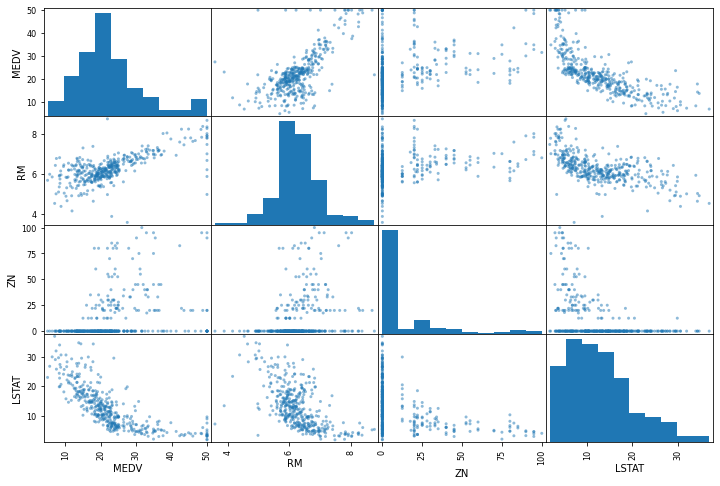

In [21]:
attributes =['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes],figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

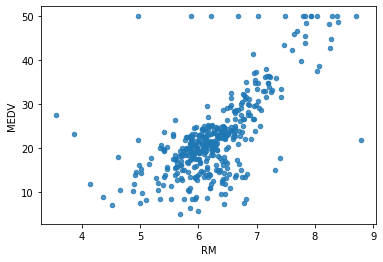

In [22]:
housing.plot(kind="scatter", x='RM', y='MEDV' ,alpha= 0.8)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

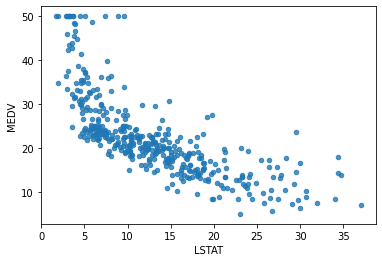

In [23]:
housing.plot(kind="scatter", x='LSTAT', y='MEDV' ,alpha= 0.8)

# Trying  out attributes combinations

In [24]:
housing['TAXRM']= housing['TAX']/housing['RM']

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [26]:
corr_matrix =housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678761
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524387
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

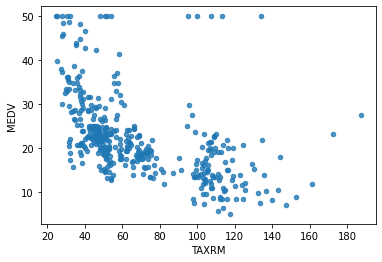

In [27]:
housing.plot(kind="scatter", x='TAXRM', y='MEDV' ,alpha= 0.8)

In [28]:
housing =  strat_train_set.drop('MEDV', axis=1)
housing_labels =  strat_train_set["MEDV"].copy()

# Missing Attributes

to take care of missing attributes,we have three options.

    1.get rid of the missing data points.(means missing data point is very less then we remove data from these particular attributes)
    2.get rid of the whole attributes.(pura attributes remove krna agr uska correlations strong nhi h tb kr sakte h)
    3.set the value to some value like (0,meanor median)

In [29]:
a =housing.dropna(subset =["RM"])#1 option and also noted dataframe which name ishousing will remain same it is just copy

In [30]:
a.shape

(400, 13)

In [31]:
housing.drop("RM", axis =1).shape#2 option

(404, 12)

In [32]:
median =housing['RM'].median()

In [33]:
median

6.209

In [34]:
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [35]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

it is calculate median for all columns and these is all things do for automatically median fit at the missing values

In [37]:
X = imputer.transform(housing)

In [38]:
housing_tr = pd.DataFrame(X, columns =housing.columns)

In [39]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.275950,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711058,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


these all operation we do with housing data which it total our data but in actual we should do these all operation on train_set data

# scikit-learn Design

## feature scaling

primarily, two type of feature scaling methods:
    1. min -max scaling(normalization)
      (value-min)/(max-min)
      sklearn provides a class called MinMaxscaler for this
    2. standardization
      (value-mean)/std
      sklearn provides a class called standardscaler for this
actually some algorithm if we leave then most of the algorithm give better performance if all scale have same level. and this two method do the work to make same scaling between 0 to 1.
    

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([ 
    ('imputer',SimpleImputer(strategy ='median')),
    ('std_scaler',StandardScaler()),
     ] )

In [42]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [43]:
housing_num_tr.shape

(404, 13)

# Model selections

## 1. Linear Regression model

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [45]:
some_data =housing[:5]

In [46]:
some_labels =housing_labels[:5]

In [47]:
prepared_data =my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([24.12217795, 27.40138504, 20.53988623, 25.05739326, 23.76960562])

In [49]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating models

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [51]:
lin_rmse

4.842946517877523

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring ="neg_mean_squared_error",cv =10)
rmse_scores =np.sqrt(-scores)

In [53]:
rmse_scores

array([4.18560141, 4.27969133, 5.09748776, 3.84500986, 5.36059318,
       4.39666403, 7.57318408, 5.51118726, 4.13503235, 6.05319578])

In [54]:
def print_scores(scores):
    print("scores:",scores)
    print("Mean:",scores.mean())
    print("standard deviation:",scores.std())

In [55]:
print_scores(rmse_scores)

scores: [4.18560141 4.27969133 5.09748776 3.84500986 5.36059318 4.39666403
 7.57318408 5.51118726 4.13503235 6.05319578]
Mean: 5.043764705943486
standard deviation: 1.0835341751246421


## DecisionTree Model

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#model = LinearRegression()
model =DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)
some_data =housing[:5]
some_labels =housing_labels[:5]
prepared_data =my_pipeline.transform(some_data)
model.predict(prepared_data)
list(some_labels)
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)



In [57]:
rmse

0.0

## using cross -validation better techniques for evaluation

basically in this techniques we devide out train set data in several part like 1 2 3 4 5 6 7 8 9 10 so we take 2 to all data and do train our model after that we test it part 1 and we find how much error it gives.

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring ="neg_mean_squared_error",cv =10)
rmse_scores =np.sqrt(-scores)

In [59]:
rmse_scores

array([3.88065873, 5.6104867 , 5.4347796 , 3.76913007, 3.7089082 ,
       4.47878332, 7.14975524, 3.85321295, 3.43511281, 4.4397072 ])

In [60]:
def print_scores(scores):
    print("scores:",scores)
    print("Mean:",scores.mean())
    print("standard deviation:",scores.std())
        

In [61]:
print_scores(rmse_scores)

scores: [3.88065873 5.6104867  5.4347796  3.76913007 3.7089082  4.47878332
 7.14975524 3.85321295 3.43511281 4.4397072 ]
Mean: 4.576053479590895
standard deviation: 1.1031926133581411


## RandomForestRegression model

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model = LinearRegression()
#model =DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)
some_data =housing[:5]
some_labels =housing_labels[:5]
prepared_data =my_pipeline.transform(some_data)
model.predict(prepared_data)
list(some_labels)
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)


In [63]:
rmse

1.244764874016035

In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring ="neg_mean_squared_error",cv =10)
rmse_scores =np.sqrt(-scores)

In [65]:
rmse_scores

array([2.84934166, 2.77963639, 4.40705364, 2.57746236, 3.42904136,
       2.74900178, 4.74065658, 3.25674482, 3.61164757, 3.37784723])

In [66]:
def print_scores(scores):
    print("scores:",scores)
    print("Mean:",scores.mean())
    print("standard deviation:",scores.std())

In [67]:
print_scores(rmse_scores)

scores: [2.84934166 2.77963639 4.40705364 2.57746236 3.42904136 2.74900178
 4.74065658 3.25674482 3.61164757 3.37784723]
Mean: 3.377843338457217
standard deviation: 0.682766524827901
